<a href="https://colab.research.google.com/github/smaciasg/Ejercicios_DataScience_Coding_Dojo/blob/main/Predicciones_de_ventas_alimenticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_predicciones = pd.read_csv('/content/drive/MyDrive/CODING DOJO/DATA SCIENCE/ACTIVIDADES SEMANA 1/sales_predictions.csv')
data_predicciones.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#**Proyecto 1 - Parte 2 (base)**

1) ¿Cuántas filas y columnas?

In [ ]:
data_predicciones.shape
#Tiene 8523 filas y 12 columnas

(8523, 12)

2) ¿Cuáles son los tipos de datos en cada variable?

In [ ]:
data_predicciones.info()
#En una exlporación rápida se identifica que los tipos de datos coinciden con lo que se entrega en el df y lo que se espera de cada variable
#Se observan datos faltantes para el peso del ítem y el tamaño de la tienda

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [ ]:
data_predicciones.duplicated().sum()
#Según la exploración no existen filas 100% duplicadas, los valores flotantes reducen esta posibilidad.

0

4) Identifiquen los valores faltantes.

In [ ]:
(data_predicciones.isna().sum()/len(data_predicciones))*100
#Del total de datos se observa que  el peso del ítem y el tamaño de la tienda presentan faltantes, se deben explorar los datos para determinar cómo llenarlos, en ambos casos
# no se cumple la condición recomedada para eliminación un 50% de faltantes en columnas y menos de un 2% faltante en filas.

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [ ]:
# En el caso del peso sería convemiente reemplazar el peso con el promedio, veamos cómo obtener el valor:
data_pesos = data_predicciones.groupby(['Item_Identifier'])[['Item_Weight']].mean()
# De este modo se tienen los valores 
# Podemos convertir este resultado en un diccionario y pasarlos en los datos faltantes
data_pesos

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [ ]:
#Función para el reemplazo de los datos
data_pesos_dict = data_pesos.to_dict()
data_pesos_dict

{'Item_Weight': {'DRA12': 11.6,
  'DRA24': 19.35,
  'DRA59': 8.27,
  'DRB01': 7.39,
  'DRB13': 6.115,
  'DRB24': 8.785,
  'DRB25': 12.3,
  'DRB48': 16.75,
  'DRC01': 5.92,
  'DRC12': 17.85,
  'DRC13': 8.26,
  'DRC24': 17.85,
  'DRC25': 5.73,
  'DRC27': 13.800000000000002,
  'DRC36': 13.0,
  'DRC49': 8.67,
  'DRD01': 12.1,
  'DRD12': 6.96,
  'DRD13': 15.0,
  'DRD15': 10.6,
  'DRD24': 13.85,
  'DRD25': 6.135000000000001,
  'DRD27': 18.75,
  'DRD37': 9.8,
  'DRD49': 9.895,
  'DRD60': 15.7,
  'DRE01': 10.1,
  'DRE03': 19.6,
  'DRE12': 4.59,
  'DRE13': 6.28,
  'DRE15': 13.35,
  'DRE25': 15.35,
  'DRE27': 11.85,
  'DRE37': 13.5,
  'DRE48': 8.43,
  'DRE49': 20.75,
  'DRE60': 9.395,
  'DRF01': 5.655,
  'DRF03': 19.1,
  'DRF13': 12.1,
  'DRF15': 18.35,
  'DRF23': 4.61,
  'DRF25': 9.0,
  'DRF27': 8.93,
  'DRF36': 16.1,
  'DRF37': 17.25,
  'DRF48': 5.73,
  'DRF49': 7.269999999999999,
  'DRF51': 15.75,
  'DRF60': 10.8,
  'DRG01': 14.800000000000002,
  'DRG03': 14.5,
  'DRG11': 6.385,
  'DRG13': 17

In [ ]:
data_pesos_dict['Item_Weight']['DRA12']

11.6

In [ ]:
#Función para asignación
def asignacion_pesos(dt_pesos_estimados_dic,dt_original_a_imputar):
  lista_pesos_asignados = []
  valor_promedio_pesos = dt_original_a_imputar['Item_Weight'].mean()
  for i in range(len(dt_original_a_imputar)):
    if pd.isna(dt_original_a_imputar['Item_Weight'][i]) == True:
      if pd.isna(dt_pesos_estimados_dic['Item_Weight'][dt_original_a_imputar['Item_Identifier'][i]]) == True:
        lista_pesos_asignados.append(valor_promedio_pesos)
      else:
          lista_pesos_asignados.append(dt_pesos_estimados_dic['Item_Weight'][dt_original_a_imputar['Item_Identifier'][i]])
    else:
      lista_pesos_asignados.append(dt_original_a_imputar['Item_Weight'][i])
  return lista_pesos_asignados

In [ ]:
data_predicciones['Item_Weight'] = asignacion_pesos(data_pesos_dict,data_predicciones)

In [ ]:
data_predicciones.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
data_predicciones[['Outlet_Identifier','Outlet_Size']].value_counts(dropna=False)
#Identificamos el código de cada una de las tiendas, al ser un parámetro no vacío, se busca el tamaño de cada tienda

Outlet_Identifier  Outlet_Size
OUT027             Medium         935
OUT013             High           932
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
OUT045             NaN            929
OUT018             Medium         928
OUT017             NaN            926
OUT010             NaN            555
OUT019             Small          528
dtype: int64

In [ ]:
#Vamos a ver si el tamaño de la tienda tiene relación con alguna variable
data_predicciones.groupby(['Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'], dropna=False)[['Outlet_Identifier']].count()

,,,,Outlet_Identifier
Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,
OUT010,NaN,Tier 3,Grocery Store,555
OUT013,High,Tier 3,Supermarket Type1,932
OUT017,NaN,Tier 2,Supermarket Type1,926
OUT018,Medium,Tier 3,Supermarket Type2,928
OUT019,Small,Tier 1,Grocery Store,528
OUT027,Medium,Tier 3,Supermarket Type3,935
OUT035,Small,Tier 2,Supermarket Type1,930
OUT045,NaN,Tier 2,Supermarket Type1,929
OUT046,Small,Tier 1,Supermarket Type1,930


In [ ]:
data_predicciones.groupby(['Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'], dropna=False)[['Item_Weight']].sum()

,,,,Item_Weight
Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,
OUT010,NaN,Tier 3,Grocery Store,7166.800000
OUT013,High,Tier 3,Supermarket Type1,12121.730000
OUT017,NaN,Tier 2,Supermarket Type1,11877.495000
OUT018,Medium,Tier 3,Supermarket Type2,11946.465000
OUT019,Small,Tier 1,Grocery Store,6868.602645
OUT027,Medium,Tier 3,Supermarket Type3,12093.557936
OUT035,Small,Tier 2,Supermarket Type1,11931.295000
OUT045,NaN,Tier 2,Supermarket Type1,11751.840000
OUT046,Small,Tier 1,Supermarket Type1,11966.125000


In [ ]:
data_predicciones.groupby(['Outlet_Establishment_Year','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'], dropna=False)[['Item_Weight']].sum()

Item_Weight
Outlet_Establishment_Year Outlet_Identifier Outlet_Size Outlet_Location_Type Outlet_Type                    
1985                      OUT019            Small       Tier 1               Grocery Store       6868.602645
                          OUT027            Medium      Tier 3               Supermarket Type3  12093.557936
1987                      OUT013            High        Tier 3               Supermarket Type1  12121.730000
1997                      OUT046            Small       Tier 1               Supermarket Type1  11966.125000
1998                      OUT010            NaN         Tier 3               Grocery Store       7166.800000
1999                      OUT049            Medium      Tier 1               Supermarket Type1  12013.225000
2002                      OUT045            NaN         Tier 2               Supermarket Type1  11751.840000
2004                      OUT035            Small       Tier 2               Supermarket Type1  11931.295000
2007                      OUT017            NaN         Tier 2               Supermarket Type1  11877.495000
2009                      OUT018            Medium      Tier 3               Supermarket Type2  11946.465000

In [ ]:
data_predicciones.groupby(['Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'], dropna=False)[['Item_Outlet_Sales']].sum()

,,,,Item_Outlet_Sales
Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,
OUT010,NaN,Tier 3,Grocery Store,1.883402e+05
OUT013,High,Tier 3,Supermarket Type1,2.142664e+06
OUT017,NaN,Tier 2,Supermarket Type1,2.167465e+06
OUT018,Medium,Tier 3,Supermarket Type2,1.851823e+06
OUT019,Small,Tier 1,Grocery Store,1.796941e+05
OUT027,Medium,Tier 3,Supermarket Type3,3.453926e+06
OUT035,Small,Tier 2,Supermarket Type1,2.268123e+06
OUT045,NaN,Tier 2,Supermarket Type1,2.036725e+06
OUT046,Small,Tier 1,Supermarket Type1,2.118395e+06


In [ ]:
data_predicciones.groupby(['Outlet_Type','Outlet_Size'], dropna=False)[['Item_Outlet_Sales']].mean()

Item_Outlet_Sales
Outlet_Type       Outlet_Size                   
Grocery Store     Small               340.329723
                  NaN                 339.351662
Supermarket Type1 High               2298.995256
                  Medium             2348.354635
                  Small              2358.343066
                  NaN                2266.410119
Supermarket Type2 Medium             1995.498739
Supermarket Type3 Medium             3694.038558

In [ ]:
data_predicciones.groupby(['Outlet_Location_Type','Outlet_Size'], dropna=False)[['Outlet_Identifier']].count()

Outlet_Identifier
Outlet_Location_Type Outlet_Size                   
Tier 1               Medium                     930
                     Small                     1458
Tier 2               Small                      930
                     NaN                       1855
Tier 3               High                       932
                     Medium                    1863
                     NaN                        555

De forma muy rápida sin ahondar podemos ver que las tiendas tipo Grocery Store tienen bajas ventas, por lo que se podría esperar que sean tiendas pequeñas.

En el caso de la combinación de tiendas con las características Tier 2	Supermarket Type1, se observa que la suma en ventas y el peso total que ha rotado por ella elevado, lo que podría dar a entender de es una tienda de tamaño mediano o grande, pero, al ver la aparición de tiendas se observa que la mayoría son pequeñas seguidas, de medians y las grandes finalmente.

En resumen:

1. La tienda OUT010 se espera sea pequeña.

2. La tienda OUT017, OUT045 son asignadas como medianas, se observa que en cada tipo de tienda hay variedad de tamañosm desde el T1 donde dominan las tiendas pequeñas, hasta el tipo 3 donde hay tiendas de gran dimensión, lo que podría indicar que el tipo2 es un intermedio, donde las tiendas tipo medio pasan a tener más relevancia. 

In [ ]:
# Para poder asignar el tamaño se va a crear una función 
def funcion_imputar_tamanio_tienda(data_predicciones):
  lista_tamano_tienda = []
  for i in range(len(data_predicciones)):
      if data_predicciones['Outlet_Identifier'][i] == 'OUT010':
        lista_tamano_tienda.append('Small')
      elif (data_predicciones['Outlet_Identifier'][i] == 'OUT017') | (data_predicciones['Outlet_Identifier'][i] == 'OUT045'): 
        lista_tamano_tienda.append('Medium')
      else:
        lista_tamano_tienda.append(data_predicciones['Outlet_Size'][i])
  return lista_tamano_tienda      

In [ ]:
data_predicciones['Outlet_Size'] = funcion_imputar_tamanio_tienda(data_predicciones)

In [ ]:
data_predicciones['Outlet_Size'].value_counts()

Medium    4648
Small     2943
High       932
Name: Outlet_Size, dtype: int64

6) Confirmen que no hay valores faltantes después de abordarlos.

In [ ]:
data_predicciones.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [ ]:
data_predicciones['Item_Fat_Content'].value_counts()
#Los ítem LF, low fat deben ser reorganizados a Low Fat y el ítem reg, deberá ser cambiado a Regular

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
data_predicciones['Item_Fat_Content'].replace('LF','Low Fat', inplace=True)

In [ ]:
data_predicciones['Item_Fat_Content'].replace('low fat','Low Fat', inplace=True)

In [ ]:
data_predicciones['Item_Fat_Content'].replace('reg','Regular', inplace=True)

In [ ]:
data_predicciones['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Las otras columnas tipo objeto ya se revisaron cuando se exploraban los datos para la imputación; no se encuentra error, o son columnas de identificadores, los cuales tienen su escritura propia.

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [ ]:
data_predicciones.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523,8523,8523.000000
unique,1559,NaN,2,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5517,NaN,1232,NaN,935,NaN,4648,3350,5577,NaN
mean,NaN,12.875412,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.645008,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.785000,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.650000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


#**Proyecto 1 - Parte 3 (base)**

####***HISTOGRAMAS***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdda24b4350>,
      dtype=object)

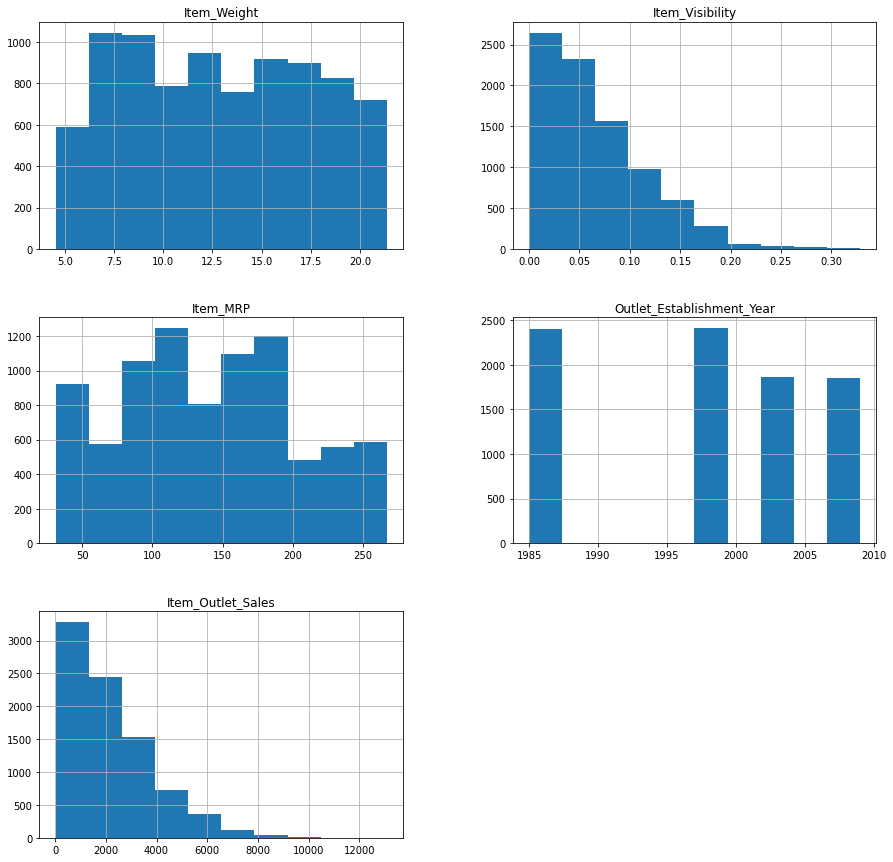

In [ ]:
#Histograma para ver las distribuciones de diversas características en el conjunto de datos.
# De manera rápida para las variables numéricas se pueden presentar los siguientes plots:
data_predicciones.hist(figsize = (15,15))

***GRÁFICOS ASOCIADOS A RECUENTOS Y SUMAS***

In [ ]:
#Valor de la venta
data_predicciones['valor_venta']=(data_predicciones['Item_MRP']*data_predicciones['Item_Outlet_Sales'])

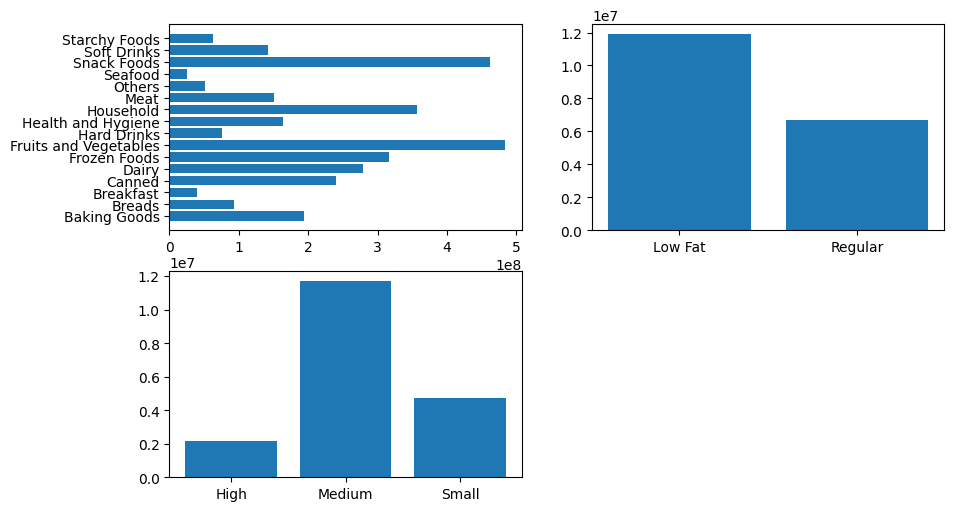

In [ ]:
fig1 = plt.figure(dpi = 100, figsize=(10,6))
### subgráfico 1
ax1 = fig1.add_subplot(2,2,1) #1 fila, 2 columna y 2 (sub)gráfico 2
ax1.barh(data_predicciones.groupby(['Item_Type'])[['valor_venta']].sum().reset_index()['Item_Type'], data_predicciones.groupby(['Item_Type'])[['valor_venta']].sum().reset_index()['valor_venta'])

### subgráfico 2
ax2 = fig1.add_subplot(2,2,2) #1 fila, 2 columna y 1 (sub)gráfico 1. 
ax2.bar(data_predicciones.groupby(['Item_Fat_Content'])[['Item_Outlet_Sales']].sum().reset_index()['Item_Fat_Content'], data_predicciones.groupby(['Item_Fat_Content'])[['Item_Outlet_Sales']].sum().reset_index()['Item_Outlet_Sales'])

### subgráfico 3
ax3 = fig1.add_subplot(2,2,3) #1 fila, 2 columna y 1 (sub)gráfico 1. Puede tener 2 (sub)gráficos
ax3.bar(data_predicciones.groupby(['Outlet_Size'])[['Item_Outlet_Sales']].sum().reset_index()['Outlet_Size'], data_predicciones.groupby(['Outlet_Size'])[['Item_Outlet_Sales']].sum().reset_index()['Item_Outlet_Sales'])
plt.show()

#De los gráficos que se realizaron se determina que los productos que más valor de venta generaron fueron las frutas y vegetales y los snack, al igual se ve que hay 
# gran cantidad de comida baja en grasa, esto es interesante ya que se observa una tendencia "saludable" en los compradores, de igual manera el tamaño
# de tiendas que generan mayor cantidad de ingresos son las de mediano tamaño, claro esto está sesgado por el supuesto realizado

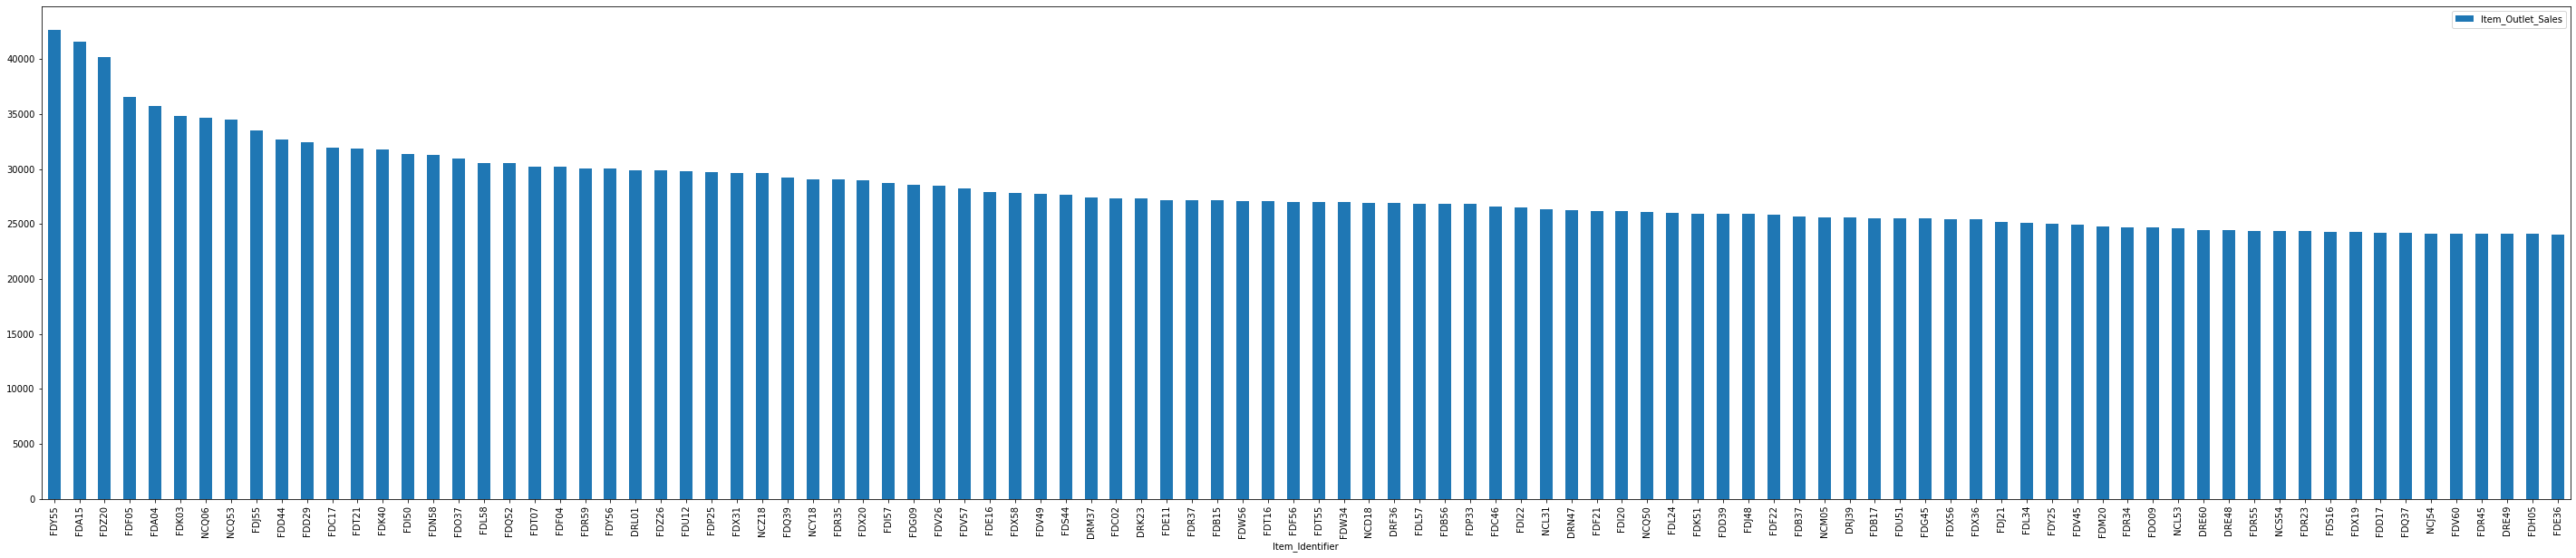

In [ ]:
#Vamos a averiguar cuáles son los 100 productos más vendidos, dado que si hay una diferencia en las cantidades de ventas pues el ítem del producto es clave para indicar que sí 
# hay una relación entre estos y la cantidad de ventas.
data_predicciones.groupby(['Item_Identifier'])[['Item_Outlet_Sales']].sum().sort_values(by="Item_Outlet_Sales", ascending=False).reset_index().head(100).plot(kind='bar', x='Item_Identifier', figsize=(50,10))

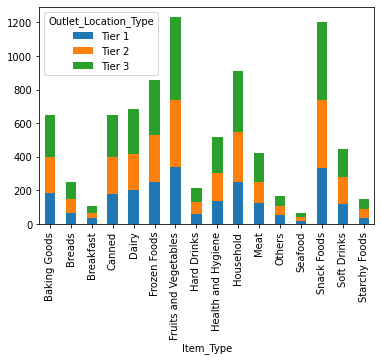

In [ ]:
pd.crosstab(data_predicciones['Item_Type'],data_predicciones['Outlet_Location_Type']).plot(kind='bar',stacked=True)
#Se observa que en los tipos de área 2y3 es dónde más se venden los productos de mayor venta, se esperaría que estos tuvieran una mayor superficie de venta.

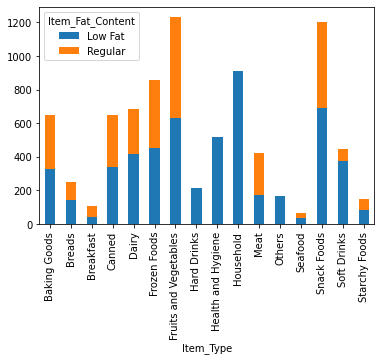

In [ ]:
pd.crosstab(data_predicciones['Item_Type'],data_predicciones['Item_Fat_Content']).plot(kind='bar',stacked=True)
#El gráfico se realiza con el fin de determinar si la combinación del tipo de ítem y su contenido de grasa tienen relación con su venta, pero en el caso
# de los dos productos más vendidos se observa que tienen una clasificación 50/50, siendo algo extraño ver frutas y vegetales con contenido regular de grasa,
# cuando debería ser bajo en grasa.

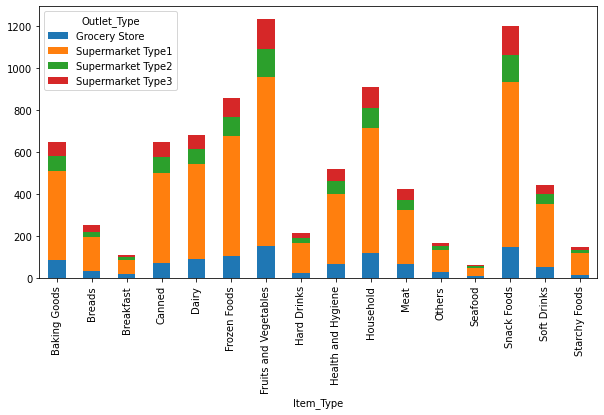

In [ ]:
pd.crosstab(data_predicciones['Item_Type'],data_predicciones['Outlet_Type']).plot(kind='bar',stacked=True, figsize = (10,5))
#El gráfico nos indica que en la mayoría de los casos se utilizan supermercados tipo 1, por lo que este factor podría ser relevante al momento de determinar 
# dónde se van a producir más ventas.

####***BOXPLOT***

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([1, 2]), <a list of 2 Text major ticklabel objects>)

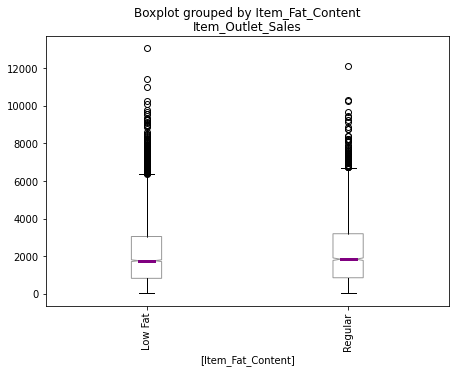

In [ ]:
data_predicciones.boxplot(column= 'Item_Outlet_Sales',
                          by=['Item_Fat_Content'], 
                          figsize = (7,5), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Purple'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))
plt.xticks(rotation=90)

#Cuando observamos la mediana de las ventas de los productos con y sin grasa, al estar ambas muescas tan cerca, podremos decir que definitivamente las ventas de productos
# con alto o bajo contenido de grasa son smilares, aclarando que como se observó con anterioridad, hay productos que no deberían estar clasificados como con 
# contenido de grasa regular.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text major ticklabel objects>)

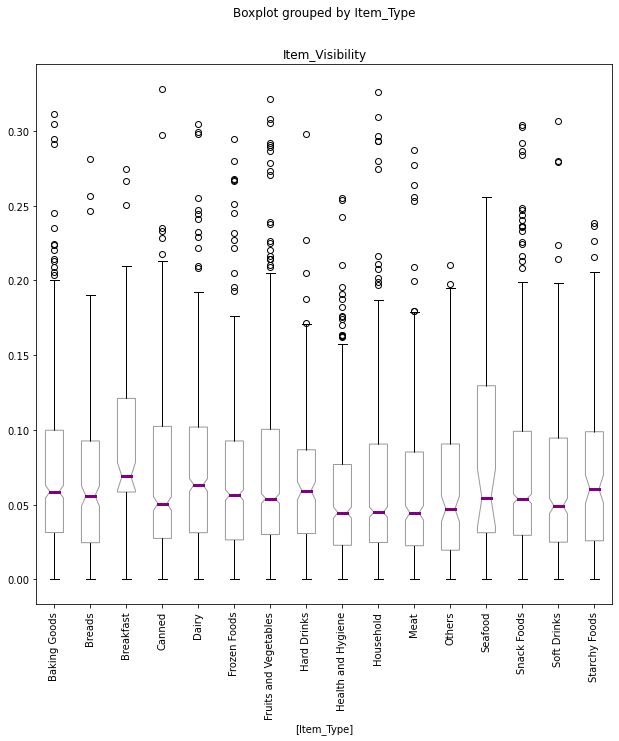

In [ ]:
data_predicciones.boxplot(column= 'Item_Visibility',
                          by=['Item_Type'], 
                          figsize = (10,10), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Purple'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))
plt.xticks(rotation=90)
#Se observa que elementos precederos como los desayunos y la comida de mar tiene mayor visibilidad, en comparación con los más vendidos como las frutas y los snacks

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([1, 2, 3, 4]), <a list of 4 Text major ticklabel objects>)

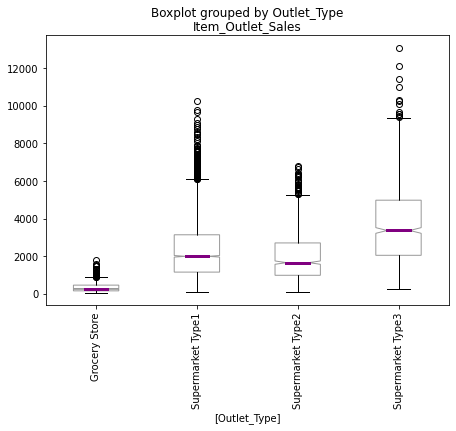

In [ ]:
data_predicciones.boxplot(column= 'Item_Outlet_Sales',
                          by=['Outlet_Type'], 
                          figsize = (7,5), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Purple'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))
plt.xticks(rotation=90)
#Se espera validar si el tipo de la tienda inluencia realmente las ventas y sí, los supermercados tipo 3, tienen una mediana de venta mayor, esto no es lo mismo
# que la cantidad de veces que se vendió en total por cada tipo de supercie, esto es, que es más probable una gran venta en super tipo 3 cuando se realiza 
# un venta allí.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([1, 2, 3, 4]), <a list of 4 Text major ticklabel objects>)

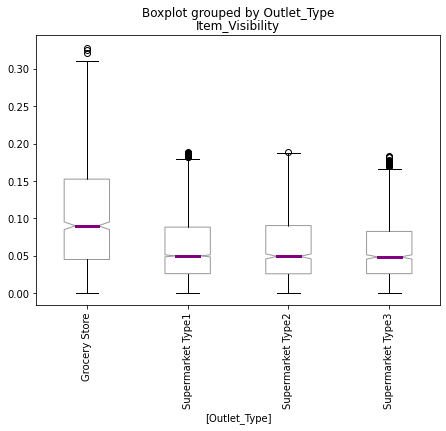

In [ ]:
data_predicciones.boxplot(column= 'Item_Visibility',
                          by=['Outlet_Type'], 
                          figsize = (7,5), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Purple'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))
plt.xticks(rotation=90)
# Al analizar la visbilidad de los productos se puede observa que en las tiendas donde se hace menor compra en cantidad, los productos estuvieron más visibles.
# Posiblemente como es más pequeño, lo que hay es más fácil de ver. 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


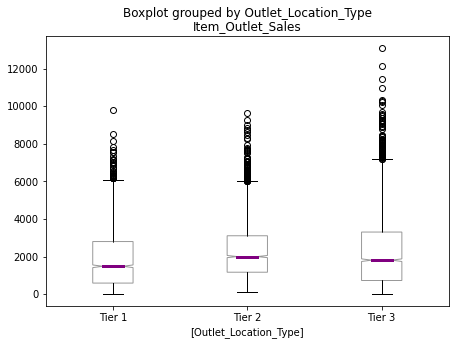

In [ ]:
data_predicciones.boxplot(column= 'Item_Outlet_Sales',
                          by=['Outlet_Location_Type'], 
                          figsize = (7,5), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Purple'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))

# Respecto a la locación, se podría decía que las tiendas tipo 2 tienen una ventaja respecto a los demás tipos de locación, pues su caja es más cerrada y la mediana está
#levemente más elevada que la de los otros tipos de tiendas.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

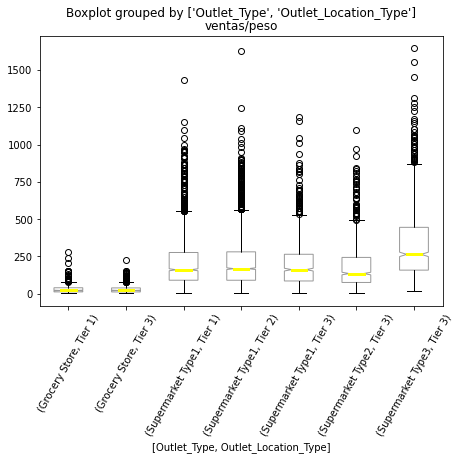

In [ ]:
data_predicciones['ventas/peso']=data_predicciones['Item_Outlet_Sales']/data_predicciones['Item_Weight']

data_predicciones.boxplot(column= 'ventas/peso',
                          by=['Outlet_Type','Outlet_Location_Type'], 
                          figsize = (7,5), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Yellow'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))
plt.xticks(rotation=60)

#Se pretendía analizar si la venta estaba influenciada por el peso, pero se observa simepre el mismo comportamiento, la superficie de tipo 3 es aquella con el mejor desempeño
# es la que tiene la mayor capacidad para la venta a gran escala, posiblemente.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

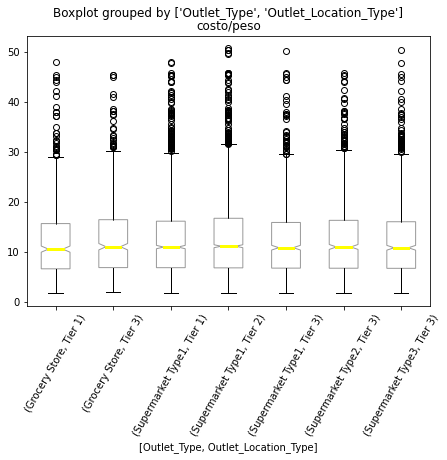

In [ ]:
data_predicciones['costo/peso']=data_predicciones['Item_MRP']/data_predicciones['Item_Weight']

data_predicciones.boxplot(column= 'costo/peso',
                          by=['Outlet_Type','Outlet_Location_Type'], 
                          figsize = (7,5), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Yellow'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))
plt.xticks(rotation=60)
#Se trata de validar si hay alguna diferencia en la unidad de costo por unidad de peso,

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

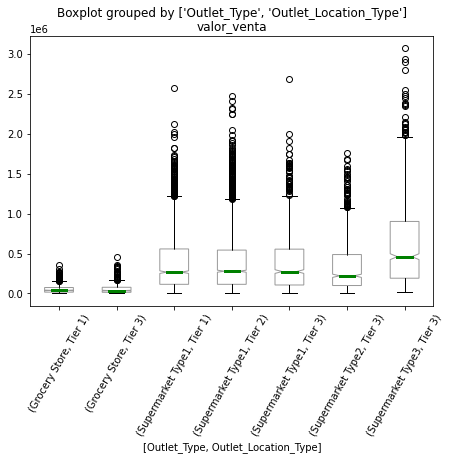

In [ ]:
data_predicciones.boxplot(column= 'valor_venta',
                          by=['Outlet_Type','Outlet_Location_Type'], 
                          figsize = (7,5), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Green'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))
plt.xticks(rotation=60)

#Finalmente, y siguiendo el mismo patrón, el mayor valor por venta es el de la tienda tipo 3 en la locación 3, seguida de la tienda 1 en todas sus superficies.

####***MAPAS DE CALOR***

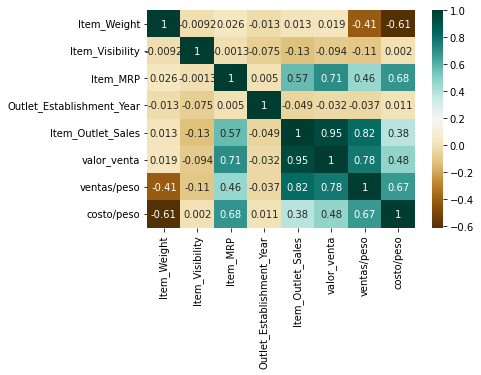

In [ ]:
variable_corr = data_predicciones.corr()
sns.heatmap(variable_corr,cmap='BrBG', annot=True)

In [ ]:
df_categorias_dumi = pd.get_dummies(data_predicciones, columns = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [ ]:
df_categorias_dumi

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,valor_venta,ventas/peso,costo/peso,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300,0.016047,249.8092,1999,3735.1380,933071.835670,401.627742,26.861204,1,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.920,0.019278,48.2692,2009,443.4228,21403.663818,74.902500,8.153581,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.500,0.016760,141.6180,1999,2097.2700,297011.182860,119.844000,8.092457,1,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.200,0.000000,182.0950,1998,732.3800,133362.736100,38.144792,9.484115,0,...,0,0,1,0,0,1,1,0,0,0
4,NCD19,8.930,0.000000,53.8614,1987,994.7052,53576.214659,111.389160,6.031512,1,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,1987,2778.3834,596023.808058,404.717174,31.248623,1,...,1,0,0,0,0,1,0,1,0,0
8519,FDS36,8.380,0.046982,108.1570,2002,549.2850,59409.017745,65.547136,12.906563,0,...,0,1,0,0,1,0,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,2004,1193.1136,101560.693105,112.557887,8.030415,1,...,0,0,1,0,1,0,0,1,0,0
8521,FDN46,7.210,0.145221,103.1332,2009,1845.5976,190342.386400,255.977476,14.304189,0,...,0,1,0,0,0,1,0,0,1,0


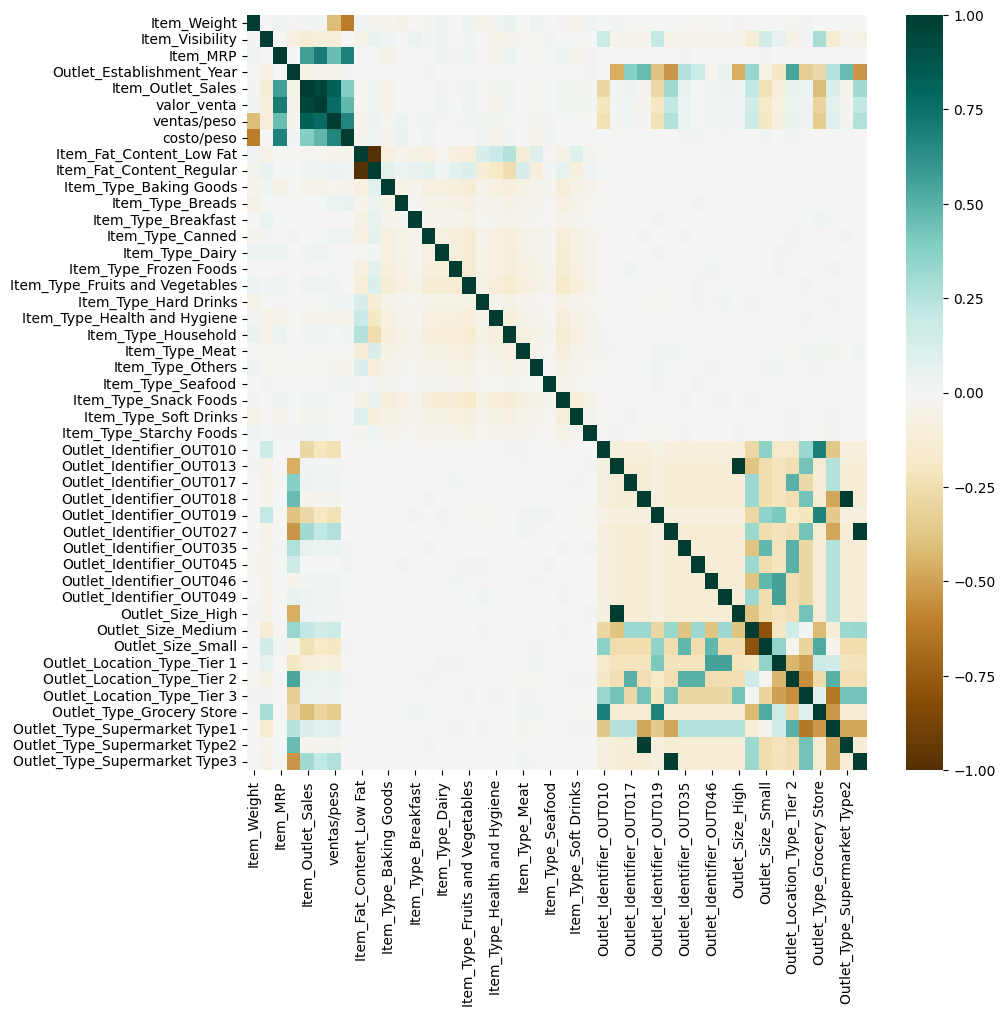

In [ ]:
var_corr_categorico= df_categorias_dumi.corr()
plt.figure(dpi = 100, figsize=(10,10))
sns.heatmap(var_corr_categorico,cmap='BrBG')

Se observa que las ventas tienen relación especial con la tiendas dónde se producen, con la relación costo/peso, con el tipo de tienda y el tipo de supermercado principalmente

#**Proyecto 1 - Parte 4 (base)**

Continuaremos trabajando en el proyecto de predicción de ventas. El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de las ventas.

In [ ]:
#Vamos a analizar cómo se comporta cada producto en función de las ventas
len(data_predicciones['Item_Identifier'].unique())

1559

In [ ]:
data_predicciones.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'valor_venta', 'ventas/peso',
       'costo/peso'],
      dtype='object')

In [ ]:
data_item_sales= data_predicciones.pivot_table(index=['Item_Identifier'],values=['Item_Outlet_Sales'],aggfunc={'Item_Outlet_Sales':['median']}).reset_index()

In [ ]:
data_item_sales['para_ordenar']=data_item_sales['Item_Outlet_Sales']['median']/data_item_sales['Item_Outlet_Sales']['median'].sum()

In [ ]:
data_item_sales_pareto = data_item_sales.sort_values(by='para_ordenar',ascending=False).reset_index()
frecuencia_relativa = data_item_sales_pareto["Item_Outlet_Sales"].cumsum()
total_defectos = data_item_sales_pareto["Item_Outlet_Sales"].sum()
data_item_sales_pareto["relativa_acum_porcentual"] = frecuencia_relativa/total_defectos*100
data_item_sales_pareto

,index,Item_Identifier,Item_Outlet_Sales,para_ordenar,relativa_acum_porcentual
,,,median,,
0,1011,FDU55,5987.5394,0.001796,0.179643
1,156,FDA15,5976.2208,0.001793,0.358947
2,1084,FDW22,5764.4964,0.001730,0.531899
3,1385,NCL42,5635.3312,0.001691,0.700975
4,855,FDR45,5617.0217,0.001685,0.869502
...,...,...,...,...,...
1554,1413,NCN29,194.4136,0.000058,99.986896
1555,1173,FDY09,175.1054,0.000053,99.992149
1556,819,FDQ60,120.5098,0.000036,99.995765


In [ ]:
data_item_sales_pareto.index

RangeIndex(start=0, stop=1559, step=1)

In [ ]:
data_item_sales_pareto['Item_Outlet_Sales']['median'].values

array([5987.5394, 5976.2208, 5764.4964, ...,  120.5098,   99.87  ,
         41.2796])

In [ ]:
#Valor donde se encuentra el 20% de los ítems más importantes, dado que son tantos ítems, no se sigue estricto pareto, se crean más divisiones
valor_x20 = data_item_sales_pareto[data_item_sales_pareto['relativa_acum_porcentual']<25].copy()
#Valor donde se encuentra el 80% de los ítems más importante
valor_x80 = data_item_sales_pareto[data_item_sales_pareto['relativa_acum_porcentual']<85].copy()


In [ ]:
#Lo que se hace es buscar el número más cercano a 20, para ello buscamos el menor residuo
valor_x20['menor_val_x20']= valor_x20[['relativa_acum_porcentual']]%20
valor_x20
# Buscamos el dato preciso 
datax20= valor_x20[['menor_val_x20']]
datax20
va_datax20=  datax20.sort_values(by='menor_val_x20').index[0]
va_datax20

148

In [ ]:
#Ahora lo que hacemos es buscar el valor de la freucencia relativa acumulada porcentual relativa_acum_porcentual, donde se tiene el datax20, 
#luego con él filtramos la data general para tener el valor de ventas y poder hacer la línea horizontal 
relativa_acum_20 = datax20.sort_values(by='menor_val_x20').values[0][0]
relativa_acum_20

0.0868632776324958

In [ ]:
#Ahora ya filtrado el df podemos extraer el valor de Item_Outlet_Sales
valor_x20[valor_x20['menor_val_x20']<=relativa_acum_20]
valor_min_ventas = valor_x20[valor_x20['menor_val_x20']<=relativa_acum_20]['Item_Outlet_Sales'].values[0][0]
valor_min_ventas

3815.034

In [ ]:
#Validamos que para el valor de relativa_acum_20 se obtegan los valores deseados
valor_x20[valor_x20['menor_val_x20']==relativa_acum_20]

,index,Item_Identifier,Item_Outlet_Sales,para_ordenar,relativa_acum_porcentual,menor_val_x20
,,,median,,,
148,1202,FDY45,3815.034,0.001145,20.086863,0.086863


In [ ]:
#DataBase con los productos más vendidos:
data_items_20mas = valor_x20[valor_x20['Item_Outlet_Sales']['median']>=valor_min_ventas]
data_items_20mas

,index,Item_Identifier,Item_Outlet_Sales,para_ordenar,relativa_acum_porcentual,menor_val_x20
,,,median,,,
0,1011,FDU55,5987.5394,0.001796,0.179643,0.179643
1,156,FDA15,5976.2208,0.001793,0.358947,0.358947
2,1084,FDW22,5764.4964,0.001730,0.531899,0.531899
3,1385,NCL42,5635.3312,0.001691,0.700975,0.700975
4,855,FDR45,5617.0217,0.001685,0.869502,0.869502
...,...,...,...,...,...,...
144,921,FDT07,3844.9950,0.001154,19.627717,19.627717
145,474,FDI09,3835.0080,0.001151,19.742778,19.742778
146,561,FDK33,3835.0080,0.001151,19.857839,19.857839


In [ ]:
#Listado de los 149 productos más vendidos
lista_productos_mas_vendidos = valor_x20[valor_x20['Item_Outlet_Sales']['median']>=valor_min_ventas]['Item_Identifier'].to_list()
lista_productos_mas_vendidos

['FDU55',
 'FDA15',
 'FDW22',
 'NCL42',
 'FDR45',
 'FDY55',
 'FDZ50',
 'NCV53',
 'FDM21',
 'FDW56',
 'DRL01',
 'FDR16',
 'FDB21',
 'FDV25',
 'NCN55',
 'FDP15',
 'FDG17',
 'FDQ52',
 'FDL57',
 'FDY14',
 'FDD44',
 'FDO11',
 'NCZ18',
 'FDC17',
 'FDK40',
 'FDD29',
 'DRK37',
 'FDA04',
 'FDN58',
 'FDY51',
 'FDT37',
 'FDQ37',
 'FDZ20',
 'FDP52',
 'DRF60',
 'FDM33',
 'FDW55',
 'NCQ53',
 'FDX02',
 'FDJ55',
 'FDB11',
 'NCD18',
 'FDN51',
 'FDO03',
 'FDG60',
 'FDT16',
 'FDC02',
 'FDC47',
 'FDX49',
 'FDM20',
 'NCJ54',
 'FDY56',
 'FDF05',
 'FDF39',
 'DRI59',
 'FDE16',
 'FDR34',
 'FDK03',
 'FDY58',
 'DRG25',
 'FDB37',
 'FDG45',
 'FDX56',
 'DRK23',
 'FDI35',
 'FDY25',
 'FDT12',
 'DRF36',
 'FDO09',
 'FDI50',
 'DRM35',
 'FDZ16',
 'NCC19',
 'FDQ33',
 'FDK57',
 'FDI20',
 'NCR38',
 'FDG14',
 'FDP48',
 'NCQ50',
 'FDK28',
 'FDF21',
 'FDI19',
 'FDA22',
 'NCC54',
 'FDB03',
 'FDS44',
 'FDA48',
 'DRD49',
 'FDK52',
 'NCZ42',
 'FDU51',
 'FDP09',
 'FDR03',
 'FDV49',
 'NCT05',
 'FDB15',
 'NCU42',
 'NCX30',
 'FDS56',


In [ ]:
#Lo que se hace es buscar el número más cercano a 80, para ello buscamos el menor residuo
valor_x80['menor_val_x80']= valor_x80[['relativa_acum_porcentual']]%80
valor_x80
# Buscamos el dato preciso 
datax80= valor_x80[['menor_val_x80']]
datax80
va_datax80=  datax80.sort_values(by='menor_val_x80').index[0]
va_datax80

921

In [ ]:
#Ahora lo que hacemos es buscar el valor de la freucencia relativa acumulada porcentual relativa_acum_porcentual, donde se tiene el datax20, 
#luego con él filtramos la data general para tener el valor de ventas y poder hacer la línea horizontal 
relativa_acum_80 = datax80.sort_values(by='menor_val_x80').values[0][0]
relativa_acum_80

0.03563903358106302

In [ ]:
#Ahora ya filtrado el df podemos extraer el valor de Item_Outlet_Sales
valor_x80[valor_x80['menor_val_x80']<=relativa_acum_80]
valor_min_ventas_80 = valor_x80[valor_x80['menor_val_x80']<=relativa_acum_80]['Item_Outlet_Sales'].values[0][0]
valor_min_ventas_80

1689.4675

In [ ]:
#Validamos que para el valor de relativa_acum_80 se obtegan los valores deseados
valor_x80[valor_x80['menor_val_x80']==relativa_acum_80]

,index,Item_Identifier,Item_Outlet_Sales,para_ordenar,relativa_acum_porcentual,menor_val_x80
,,,median,,,
921,1374,NCK54,1689.4675,0.000507,80.035639,0.035639


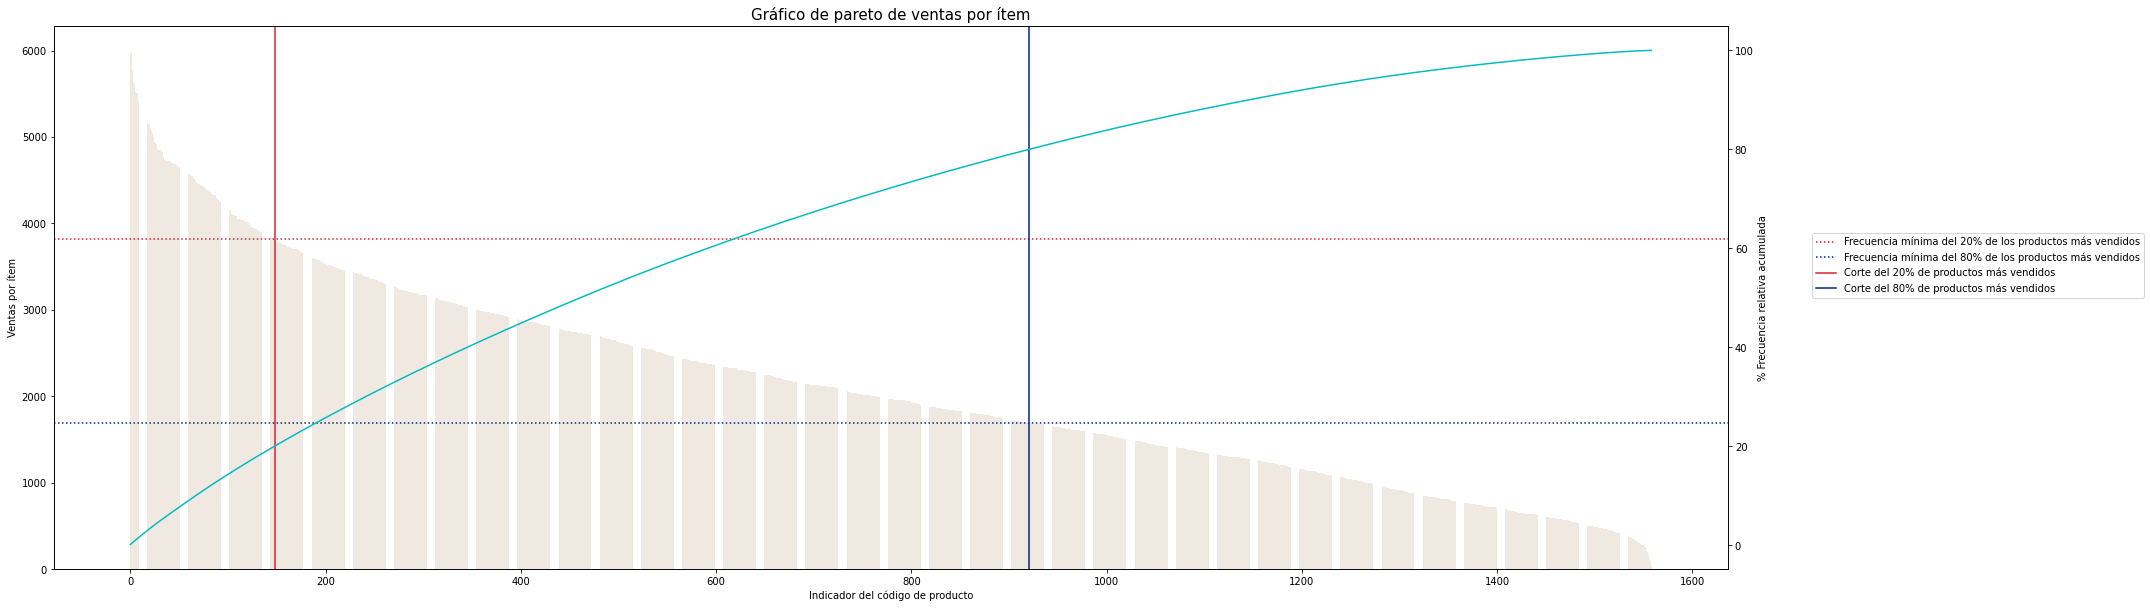

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(30,10))
axes.bar(data_item_sales_pareto.index,data_item_sales_pareto['Item_Outlet_Sales']['median'].values, color='#EFE9E2')
axes.set_ylabel("Ventas por ítem")
axes.set_xlabel("Indicador del código de producto")
axes.set_title("Gráfico de pareto de ventas por ítem", fontsize=15)
plt.axhline(y = valor_min_ventas, color = '#D91D2F', label = 'Frecuencia mínima del 20% de los productos más vendidos',linestyle=':') 
plt.axhline(y = valor_min_ventas_80, color = '#002379', label = 'Frecuencia mínima del 80% de los productos más vendidos',linestyle=':') 
plt.axvline(x= va_datax20,color = '#D91D2F', label = 'Corte del 20% de productos más vendidos') 
plt.axvline(x = va_datax80, color = '#002379', label = 'Corte del 80% de productos más vendidos') 
axes2 = axes.twinx()
axes2.plot(data_item_sales_pareto.index,data_item_sales_pareto['relativa_acum_porcentual'].values, c='#05BAC1')
axes2.set_ylabel("% Frecuencia relativa acumulada")
axes.legend(loc=(1.05,0.5))
plt.show()

  Ahora bien los productos que nos interesan son:
  
  * Aquellos que estén arriba de la línea roja horizontal y a la izquierda de la línea roja vertical, estos son los 149 productos de mayor venta, en los que se podría concentrar la compañía. En la variable **lista_productos_mas_vendidos**, se encuentra el listado.

* En en una segunda intancia podría dedicarse del producto 149 a 921 en mayor venta, estos son loa que están arriba de la lína azul horizontal y a la izquierda de la línea azul vertical.

Nota: tenga presente que el punto de corte al 20% y 80% es entre la línea vertical y la cuerva color cian, las líneas horizontales es el punto de corte de las barras con la línea vertical

####**Caracterización de los productos más vendidos**

In [ ]:
# Usaremos el DataFrame creado solo con estos productos 

data_predicciones['producto_20top'] = [True if data_predicciones['Item_Identifier'][i] in lista_productos_mas_vendidos else False for i in range(len(data_predicciones))]

In [ ]:
# Creación de la copia del dataframe solo con los datos que poseen las características deseadas
data_item_20top = data_predicciones[data_predicciones['producto_20top'] == True].copy()
#Bd resto de data
data_item_rest = data_predicciones[data_predicciones['producto_20top'] != True].copy()

In [ ]:
#Validación de la extracción de la data requerida
len(data_item_20top['Item_Identifier'].unique())

149

In [ ]:
data_item_20top

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,valor_venta,ventas/peso,costo/peso,producto_20top
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.330718e+05,401.627742,26.861204,True
32,FDP33,18.700,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,7.874566e+05,164.064513,13.725519,True
43,FDC02,21.350,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228,1.759327e+06,317.026829,12.174604,True
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,Medium,Tier 2,Supermarket Type1,5815.0972,1.542295e+06,581.509720,26.522260,True
49,FDS02,10.195,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176,1.536285e+05,76.539245,19.311368,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,5.000,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490,1.183821e+06,1252.369800,37.810600,True
8491,FDO03,10.395,Regular,0.037033,Meat,227.9352,OUT018,2009,Medium,Tier 3,Supermarket Type2,4809.7392,1.096309e+06,462.697374,21.927388,True
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,Small,Tier 3,Grocery Store,424.7804,9.089884e+04,52.442025,26.418543,True
8510,FDN58,13.800,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Small,Tier 2,Supermarket Type1,7182.6504,1.663490e+06,520.481913,16.782493,True


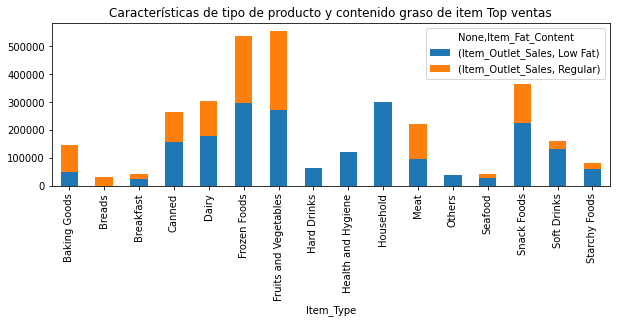

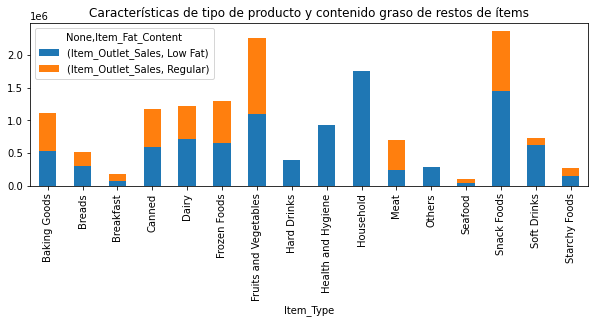

In [ ]:
#Uso de gráficas de barras para determinar las características de los productos más vendidos
data_item_20top.pivot_table(index=['Item_Type'],columns=['Item_Fat_Content'], values=['Item_Outlet_Sales'], aggfunc=np.sum, fill_value=0 ).plot(kind='bar',stacked=True, figsize=(10,3))
plt.title('Características de tipo de producto y contenido graso de item Top ventas')
data_item_rest.pivot_table(index=['Item_Type'],columns=['Item_Fat_Content'], values=['Item_Outlet_Sales'], aggfunc=np.sum, fill_value=0 ).plot(kind='bar',stacked=True, figsize=(10,3))
plt.title('Características de tipo de producto y contenido graso de restos de ítems')
plt.show()
#El gráfico se realiza con el fin de determinar si la combinación del tipo de ítem y su contenido de grasa tienen relación con su venta, pero en el caso
# de los dos productos más vendidos se observa que tienen una clasificación 50/50, siendo algo extraño ver frutas y vegetales con contenido regular de grasa,
# cuando debería ser bajo en grasa.

#Para este caso se observa que la venta se concentra en 5 clases principales, en orden: Frutas y vegetales, comida congelada, snack, comida casera, dairy, a diferencia de los
# productos de menor venta que se concentran en los tipo snak y en la comida casera

In [ ]:
data_predicciones.groupby(['producto_20top'])['Item_Visibility'].median()

producto_20top
False    0.053362
True     0.060297
Name: Item_Visibility, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


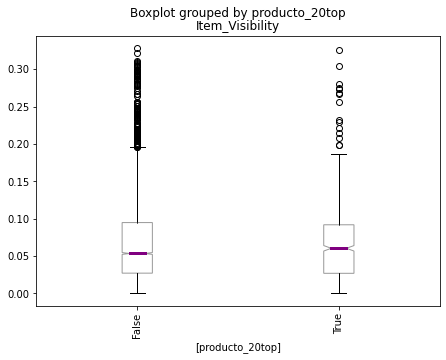

In [ ]:
#Validemos la visibilidad del ítem, para ver si los ítems más vendidos pueden tener un bajo peso en comparación con los que son menos vendidos
data_predicciones.boxplot(column= 'Item_Visibility',
                          by=['producto_20top'], 
                          figsize = (7,5), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Purple'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))
plt.xticks(rotation=90)
plt.show()

#Se observa que los productos más vendidos son más visibles que los que no son tan vendidos, en el caso de los vendidos la mediana está al menos 0.007
# unidades más arriba que al validar el rango de la visibilidad, esto puede ser significativo
# También es notorio ver una caja mucho mejor distribuida para los productos más vendidos en cuanto a la visibilidad, para los que son menos
#vendidos se observa una tendencia a menor visibilidad, la mediana se desplaza hacia abajo de la caja

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


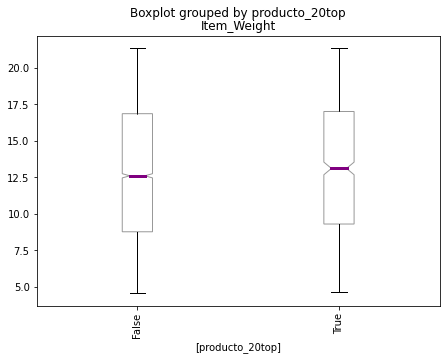

In [ ]:
#Validemos el peso del ítem, para ver si los ítems más vendidos pueden tener un bajo peso en comparación con los que son menos vendidos
data_predicciones.boxplot(column= 'Item_Weight',
                          by=['producto_20top'], 
                          figsize = (7,5), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Purple'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))
plt.xticks(rotation=90)
plt.show()

#Analizando el comportamiento respecto al peso, se observa que los componentes más vendidos son por lo general algo más pesados que los
# menos vendidos, las muescas se solapan muy poco.
# A pesar de ello los bigotes tienen el mismo rango y no se observan puntos atípicos. 

####**Validación de tiendas que están asociadas a los productos más vendidos**

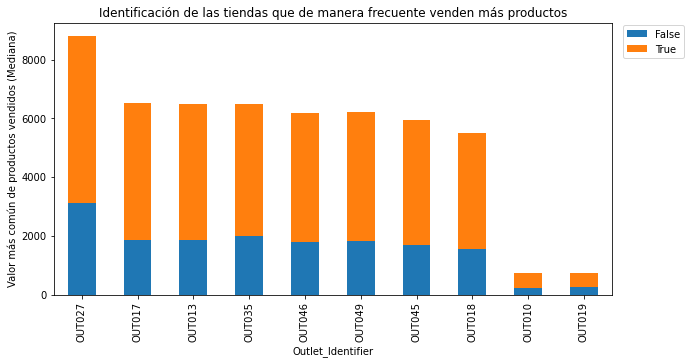

In [ ]:
data_top_total = data_predicciones.pivot_table(index=['Outlet_Identifier'],columns=['producto_20top'] ,values=['Item_Outlet_Sales'], aggfunc=np.median, fill_value=0 )
data_top_total['total_top'] = data_top_total['Item_Outlet_Sales'][1]
data_top_total= data_top_total.sort_values(by='total_top', ascending=False).plot(kind='bar',stacked=True, figsize=(10,5),y='Item_Outlet_Sales')
plt.title('Identificación de las tiendas que de manera frecuente venden más productos')
plt.ylabel('Valor más común de productos vendidos (Mediana)')
plt.legend(loc=(1.02,0.87))
plt.show()
#Es claro que la tienda que de manera frecuente vende más productos es la OUT027, seguido de las tiendas OUT017, OUT013

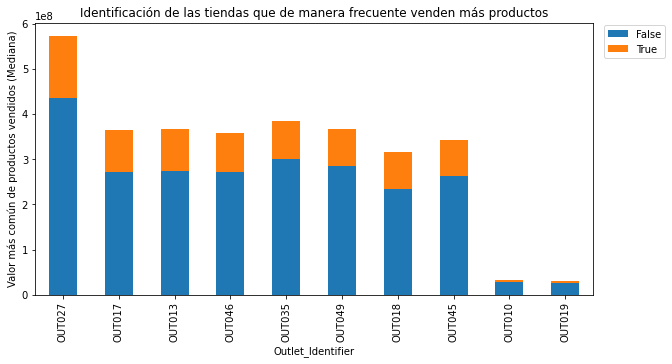

In [ ]:
#Ahora describimos el comportamiento en función de los ingresos de las tiendas, para ver si se mantiene el comportamiento
data_top_total = data_predicciones.pivot_table(index=['Outlet_Identifier'],columns=['producto_20top'] ,values=['valor_venta'], aggfunc=np.sum, fill_value=0 )
data_top_total['total_top'] = data_top_total['valor_venta'][1]
data_top_total= data_top_total.sort_values(by='total_top', ascending=False).plot(kind='bar',stacked=True, figsize=(10,5),y='valor_venta')
plt.title('Identificación de las tiendas que más reciben ingresos')
plt.ylabel('Valor en ventas')
plt.legend(loc=(1.02,0.87))
plt.show()
#Es claro que la tienda que más recibe ingresos por los productos TOP es la tienda OUT027, seguida de la OUT017 y OUT013.

In [ ]:
# Tabla dinámica para conocer la relación de ingresos de los productos 
data_tiendas=data_predicciones.pivot_table(index=['Outlet_Identifier'],columns=['producto_20top'] ,values=['valor_venta'], aggfunc=np.sum, fill_value=0 )
data_tiendas['total'] = data_tiendas['valor_venta'][0]+data_tiendas['valor_venta'][1]

In [ ]:
#Ahora calculamos la relación porcentual, para saber en verdad cuál tienda gana más por la venta de s productos del top de 20% del pareto
data_tiendas['porcentaje_top20'] = (data_tiendas['valor_venta'][1]/data_tiendas['total'])*100
data_tiendas['porcentaje_outtop'] = (data_tiendas['valor_venta'][0]/data_tiendas['total'])*100

In [ ]:
data_tiendas = data_tiendas.sort_values(by='porcentaje_top20', ascending=False)

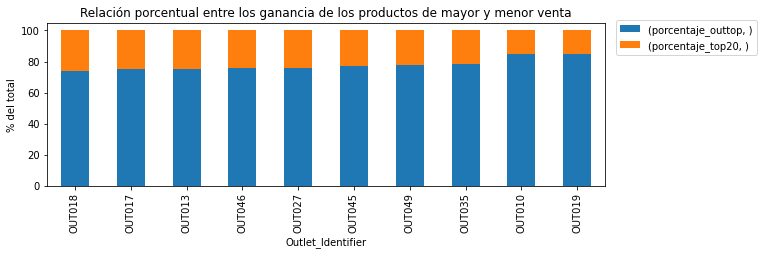

In [ ]:
data_tiendas.loc[:,['porcentaje_outtop','porcentaje_top20']].plot(kind='bar',stacked=True, figsize=(10,3))
plt.ylabel('% del total')
plt.title('Relación porcentual entre los ganancia de los productos de mayor y menor venta')
plt.legend(loc=(1.02,0.8))
plt.show()
#A pesar de no tener los ingresos totales más altos, para la tienda OUT018 los ingresos por los porductos TOP representa aproximadamente
#el 20 de sus ingresos.
#Finalmente podemos concluir que las tiendas OUT:017-013-046-018-027, son las que tienen las características necesarias para patenciar las ventas

In [ ]:
data_predicciones.groupby(['Outlet_Identifier','Outlet_Establishment_Year',	'Outlet_Size',	'Outlet_Location_Type',	'Outlet_Type'])[['valor_venta']].mean().sort_values(by='valor_venta', ascending=False)

,,,,,valor_venta
Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,
OUT027,1985,Medium,Tier 3,Supermarket Type3,613247.247437
OUT035,2004,Small,Tier 2,Supermarket Type1,414685.660219
OUT049,1999,Medium,Tier 1,Supermarket Type1,394623.102157
OUT013,1987,High,Tier 3,Supermarket Type1,393237.401465
OUT017,2007,Medium,Tier 2,Supermarket Type1,393231.290175
OUT046,1997,Small,Tier 1,Supermarket Type1,384215.552655
OUT045,2002,Medium,Tier 2,Supermarket Type1,369473.226617
OUT018,2009,Medium,Tier 3,Supermarket Type2,340703.910863
OUT010,1998,Small,Tier 3,Grocery Store,57835.118369


Las tiendas comparten las siguientes características:

**TAMAÑO**

+ 3 son medianas

+ 1 es grande

+ 1 es pequena la OUT046

**TIPO DE LOCACIÓN**

+ 3 tier 3

+ 1 tier 2

+ 1 tier 1

**TIPO DE TIENDA**

+ 3 Supermarket Type1

+ 1 Supermarket Type2

+ 1 Supermarket Type1

***CONCLUSIÓN***

Es conveniente tener una tienda de tamaño medio, en una locación tier3 y con un tipo de tienda 1

#**Proyecto 1 - Parte 5 (base)**

Continuaremos trabajando en el proyecto de la predicciones de ventas. El objetivo de este paso es ayudar al distribuidor usando el aprendizaje automático para hacer predicciones sobre futuras ventas basándose en los datos proporcionados.

Para la parte 5, regresarán al conjunto de datos original con el objetivo de evitar una fuga de datos.  

Nota: Si imputaron los valores faltantes basados en un cálculo en todo el conjunto de datos (como la media), ahora deben realizar ese paso después de hacer train test split usando SimpleImputer.  

Identifiquen el objetivo (X) y las características (y): Asignen la columna "Item_Outlet_Sales" somo el objetivo y el resto de las variables relevantes como el matriz de características. 

Realicen un train test split 

Creen un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático.

####**1) Importar las bibliotecas necesarias**

In [1]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import set_config
set_config(display='diagram')

####**2) Importar los datos y explorarlos**

Volveré a importar los datos para que no tengan ningún cambio, ni transofmración que yo haya realizado

In [4]:
ventas_alimenticias = pd.read_csv('/content/drive/MyDrive/CODING DOJO/DATA SCIENCE/ACTIVIDADES SEMANA 1/sales_predictions.csv')
ventas_alimenticias.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
ventas_alimenticias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**COLUMNA OBJETIVO: Item_Outlet_Sales**

In [6]:
#Columnas con datos faltantes
ventas_alimenticias.isna().sum()

#Item_Weight - float
#Outlet_Size - object

# Esto quiere decir que solo tenemos que imputar los datos flotantes y un objeto

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**VARIABLES ORDINALES**: No hay variables que sea necesario priorizar ojerarquizar, justamente si esto se hace se impide determinar en cuál tienda se podrían estar presentando más ventas

####**3) División de la validación: Crear matriz de características y vector objetivo**

In [9]:
X = ventas_alimenticias.drop(columns='Item_Outlet_Sales')
y = ventas_alimenticias['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

####**4) Crear los selectores de columnas categóricas y numéricas**

In [10]:
numeric_selector = make_column_selector(dtype_include='number') #Selector de columnas numéricas
object_selector = make_column_selector(dtype_include='object') #Selector de columnas tipo object

####**5) Instanciar los transformadores numérico y categórico**

**Transformadores para los IMPUTER**

In [11]:
#Dado que solo tenemos variables tipo float se elegie la media como imputador
imputer_numeric_mean = SimpleImputer(strategy='mean')
imputer_object_freq = SimpleImputer(strategy='most_frequent')

**Transformador de escala - Escalador**

In [13]:
scaler = StandardScaler()

**Tranformador para datos categóricos OneHotEncoder**

In [14]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

####**6) Crear/instanciar los PIPELINES a usar**

**pipeline numérico**

In [15]:
numeric_pipe = make_pipeline(imputer_numeric_mean,scaler) #Recibe un imputer y un transformador
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

**pipeline categórico**

In [16]:
object_pipe = make_pipeline(imputer_object_freq,ohe) #Recibe un imputer y el transformador ohe
object_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

####**7) Instanciar ColumnTransformer**

**tupla para el columntrasnformer numérico**

In [17]:
numeric_tuple = (numeric_pipe, numeric_selector) #Recibe un pipeline y un selector de columnas para aplicarlo
numeric_tuple

(Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7f240cb80d10>)

**tuplca para el columntransformer categórico**

In [19]:
object_tuple = (object_pipe, object_selector) #Recibe un pipeline asociado a los objetos y el selector de columna de los objetos para ser transformados
object_tuple

(Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False))]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7f240cb80d90>)

**CREAMOS EL COLUMNTRANSFORMER**

In [20]:
preprocessed = make_column_transformer(numeric_tuple,object_tuple, remainder='passthrough') #Recibe las tuplas de los elementos a transformar con las instrucciones y la indicación de qué hacer si una columna tiene un tipo no seleccionado
preprocessed

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f240cb80d10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f240cb80d90>)])

####**8) Transformador de datos**

**Ajustar la variable que contiene el ColumnTrasnformer con los datos de ENTRENAMIENTO**

In [22]:
preprocessed.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f240cb80d10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f240cb80d90>)])

**TRANSFORMAR los datos de entrenamiento y los de prueba**

In [24]:
X_train_processed = preprocessed.transform(X_train) #Transformación de los datos de entrenamiento
X_train_processed

array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [25]:
X_test_processed = preprocessed.transform(X_test) #Transformación de los datos de prueba
X_test_processed

array([[ 0.33100885, -0.77664625, -0.99881554, ...,  1.        ,
         0.        ,  0.        ],
       [-1.17989246,  0.1003166 , -1.58519423, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.37844688, -0.48299432, -1.59578435, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.13957013,  1.21832428,  1.09397975, ...,  1.        ,
         0.        ,  0.        ],
       [-1.49772727, -0.77809567, -0.36679966, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.52076098, -0.77976293,  0.11221189, ...,  1.        ,
         0.        ,  0.        ]])

####**9) Inspeccionar el resultado**

In [26]:
print(np.isnan(X_train_processed).sum().sum(), 'Cantidad de datos faltante en matriz de características de entrenamiento')
print(np.isnan(X_test_processed).sum().sum(), 'Cantidad de datos faltantes en la matriz de características de prueba')
print('--------------------------------------------------------------')
print('Todos los datos en el conjunto X_train_processed son del tipo:' , X_train_processed.dtype)
print('Todos los datos en el conjunto X_test_processed son del tipo:', X_test_processed.dtype)
print('--------------------------------------------------------------')
print('La forma de los datos de entrenamiento es: ', X_train_processed.shape)
print('La forma de los datos de prueba es: ', X_test_processed.shape)

0 Cantidad de datos faltante en matriz de características de entrenamiento
0 Cantidad de datos faltantes en la matriz de características de prueba
--------------------------------------------------------------
Todos los datos en el conjunto X_train_processed son del tipo: float64
Todos los datos en el conjunto X_test_processed son del tipo: float64
--------------------------------------------------------------
La forma de los datos de entrenamiento es:  (6392, 1595)
La forma de los datos de prueba es:  (2131, 1595)
